# Training K-Nearest Neighbors machine learning model with scikit-learn


## Agenda

- What is the **K-nearest neighbors** classification model?
- What are the four steps for **model training and prediction** in scikit-learn?
- How can I apply this pattern to **other machine learning models**?

K-nearest neighbors, or K-NN, is a simple form of supervised learning. It assigns an output label to a new input example x based on it's closest neighboring datapoints. The number K is the number of data points to use. 

For K=1, x is assigned the label of the closest neighbor. If K>1, the majority vote is used to label x.

The code in this tutorial is slightly modified from the scikit-learn [K-NN example](http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#example-neighbors-plot-classification-py). There is also information on the K-NN classifier function [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier).


## Reviewing the iris dataset

In [2]:
%matplotlib inline 
# Import patch for drawing rectangles in the legend
from matplotlib.patches import Rectangle
from matplotlib.colors import ListedColormap

# Create color maps
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

# Create a legend for the colors, using rectangles for the corresponding colormap colors
labelList = []
for color in cmap_bold.colors:
    labelList.append(Rectangle((0, 0), 1, 1, fc=color))

In [3]:
# import load_iris function from datasets module
from sklearn.datasets import load_iris
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# save "bunch" object containing iris dataset and its attributes
iris = load_iris()
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


- 150 **observations**
- 4 **features** (sepal length, sepal width, petal length, petal width)
- **Response** variable is the iris species
- **Classification** problem since response is categorical
- More information in the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Iris)

## K-nearest neighbors (KNN) classification

1. Pick a value for K.
2. Search for the K observations in the training data that are "nearest" to the measurements of the unknown iris.
3. Use the most popular response value from the K nearest neighbors as the predicted response value for the unknown iris.

### Example training data

![Training data](images/04_knn_dataset.png)

### KNN classification map (K=1)

![1NN classification map](images/04_1nn_map.png)

### KNN classification map (K=5)

![5NN classification map](images/04_5nn_map.png)

*Image Credits: [Data3classes](http://commons.wikimedia.org/wiki/File:Data3classes.png#/media/File:Data3classes.png), [Map1NN](http://commons.wikimedia.org/wiki/File:Map1NN.png#/media/File:Map1NN.png), [Map5NN](http://commons.wikimedia.org/wiki/File:Map5NN.png#/media/File:Map5NN.png) by Agor153. Licensed under CC BY-SA 3.0*

## Loading the data

In [4]:
# store feature matrix in "X"
X = iris.data

# store response vector in "y"
y = iris.target

In [5]:
# print the shapes of X and y
print(X.shape)
print(y.shape)

(150, 4)
(150,)


## scikit-learn 4-step modeling pattern

**Step 1:** Import the class you plan to use

In [6]:
from sklearn.neighbors import KNeighborsClassifier

**Step 2:** "Instantiate" the "estimator"

- "Estimator" is scikit-learn's term for model
- "Instantiate" means "make an instance of"

In [7]:
knn = KNeighborsClassifier(n_neighbors=1)

- Name (e.g. knn ) of the object does not matter
- Can specify tuning parameters (aka "hyperparameters") during this step
- All parameters not specified are set to their defaults

In [8]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


 - weights can be uniform or scaled based on the distance.  closer points have more impact.
 - metric, [DistanceMetric](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html) can be a number of different distance calculations.

**Step 3:** Fit the model with data (aka "model training")

- Model is learning the relationship between X and y
- Occurs in-place

In [9]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

**Step 4:** Predict the response for a new observation

- New observations are called "out-of-sample" data
- Uses the information it learned during the model training process

In [10]:
# syntax might look a little wierd.
# a collection of observations
# i.e.: an array of arrays
predictions = knn.predict([[3, 5, 4, 2]])
for prediction in predictions:
    print(f"Predicted Iris type: {prediction} or {iris.target_names[prediction]}")

Predicted Iris type: 2 or virginica


- Returns a NumPy array
- Can predict for multiple observations at once

In [11]:
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
predictions = knn.predict(X_new)
for prediction in predictions:
    print(f"Predicted Iris type: {prediction} or {iris.target_names[prediction]}")

Predicted Iris type: 2 or virginica
Predicted Iris type: 1 or versicolor


## Using a different value for K

What if we use a different value for 'k' or the number of neighbors to consider.

From above, we see that changing the 'k' value, changes the predicted areas.


In [12]:
# instantiate the model (using the value K=5)
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X, y)

# predict the response for new observations
predictions = knn.predict(X_new)
for prediction in predictions:
    print(f"Predicted Iris type: {prediction} or {iris.target_names[prediction]}")

Predicted Iris type: 1 or versicolor
Predicted Iris type: 1 or versicolor


You can see, that changing 'k' changed the outcome.  The first sample, [3,5,4,2] was predicted to be 'versicolor' for k=1, but 'setosa' for k=5.

What if we change the weight parameter from 'uniform' to 'distance'  In other words, weight the points closer to the sample higher that one further away:

In [13]:
# instantiate the model (using the value K=5)
knn = KNeighborsClassifier(n_neighbors=5,  weights='distance')

# fit the model with data
knn.fit(X, y)

# predict the response for new observations
predictions = knn.predict(X_new)
for prediction in predictions:
    print(f"Predicted Iris type: {prediction} or {iris.target_names[prediction]}")

Predicted Iris type: 1 or versicolor
Predicted Iris type: 1 or versicolor


## Using a different classification model

#### LogisticRegression

Still a classification model, even though it has 'regression' in its name

In [14]:
# import the class
# LogisticRegression is a classification model
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X, y)

# predict the response for new observations
predictions = logreg.predict(X_new)
for prediction in predictions:
    print(f"Predicted Iris type: {prediction} or {iris.target_names[prediction]}")

Predicted Iris type: 2 or virginica
Predicted Iris type: 0 or setosa


## Examine the KNN boundaries for various 'k' values and weights

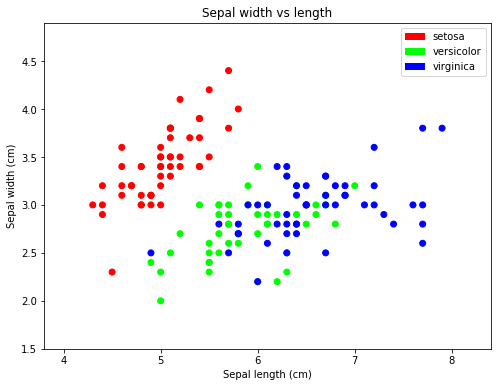

In [15]:
# Just consider: Sepal length and width
X_small = X[:,:2]
# Get the minimum and maximum values with an additional 0.5 border
x_min, x_max = X_small[:, 0].min() - .5, X_small[:, 0].max() + .5
y_min, y_max = X_small[:, 1].min() - .5, X_small[:, 1].max() + .5

plt.figure(figsize=(8, 6))

# Plot the training points
plt.scatter(X_small[:, 0], X_small[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Sepal width vs length')

# Set the plot limits
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Plot the legend
plt.legend(labelList, iris.target_names)

plt.show()


In [18]:
from ml_util import plot_knn_boundaries
X_sepal = X[:,:2]  # use all rows, and columns 0, 1 


### Plot the classification boundaries for n_neighbors = 1

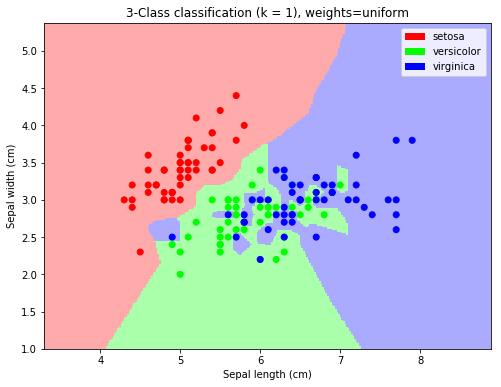

In [19]:
plot_knn_boundaries(X_sepal, y, iris.target_names, n_neighbors=1)

### Plot the classification boundaries for n_neighbors = 15

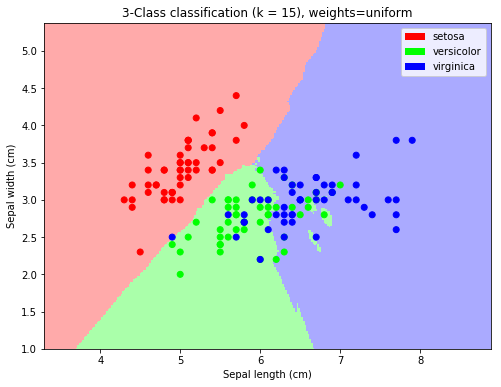

In [20]:
plot_knn_boundaries(X_sepal, y, iris.target_names, n_neighbors=15)

### Plot the classification boundaries for n_neighbors = 15 and weights = 'distance'

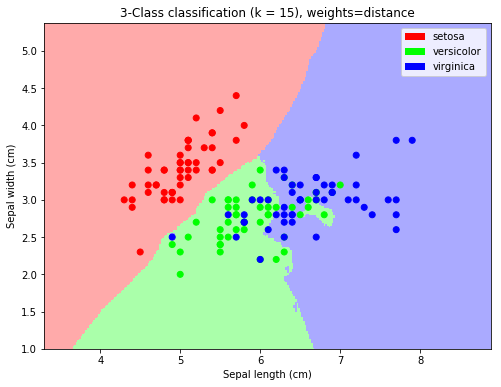

In [21]:
plot_knn_boundaries(X_small, y, iris.target_names, n_neighbors=15, weights='distance')

### Plot the classification boundaries for LogisticRegression

Notice how a different model has similar, but yet very different boundaries.

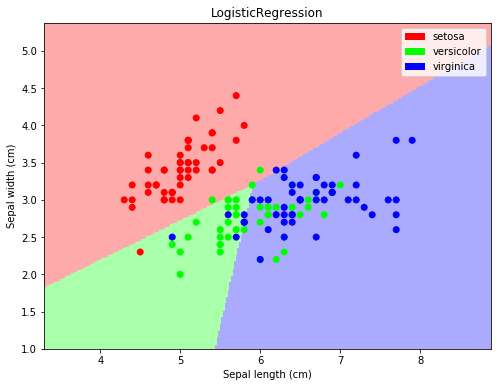

In [22]:
from ml_util import plot_logreg_boundaries
plot_logreg_boundaries(X_small, y, iris.target_names)

## How do we know which model performs the best?

In the next notebook we will look at how to evaluate the performance of hyperparameters of a model, and looking at the performance of different models.


## Resources

- [Nearest Neighbors](http://scikit-learn.org/stable/modules/neighbors.html) (user guide), [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) (class documentation)
- [Logistic Regression](http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) (user guide), [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) (class documentation)
- [Videos from An Introduction to Statistical Learning](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/)
    - Classification Problems and K-Nearest Neighbors (Chapter 2)
    - Introduction to Classification (Chapter 4)
    - Logistic Regression and Maximum Likelihood (Chapter 4)